# Image Augmentation Demo

## Data Augmentation

- Technique of artificially increasing the training set by creating modified copies of a dataset using existing data.
- Basically involves making minor changes to generate new data points that the model can be trained on.
- **Augmented Data vs Synthetic Data**
  - Augmented Data involves generating modified versions of exisiting data to get more diversity in the dataset. Eg.: Blurring the images in a dataset allows the model to accurately classify images even when they are noisy.
  - Synthetic Data involves generating brand new data artificially. No data is modified, it is created.

## Why Data Augmentation

- Data collection can be a very time and resource heavy process.
- It helps ML Models perform better without getting more data by simply extracting more value from the given data.
- It prevents overfitting, increases Accuracy, creates divertsity.
- Very helpful when datasets are small and imbalanced.

## When to use Data Augmentation

1. To prevent Overfitting
2. When initial set is too small
3. To improve model accuracy
4. Reduce operational cost of labeling and cleaning raw datasets

## Limitations of Data Augmentation

1. Biases in the original dataset presist. So if your model is not performing well because of that, augmentation will not help.
2. Quality Assurance of augmented data is required.
3. Creating effective augmentation models and approaches is itself very difficult.

## Different Types of Data Augmentation

### Audio

1. Noise Injection: Adding random noise to the data. Eg: Gaussian/Static Noise/ Adding traffic noise to a perfect clip to simulate real world environments.
2. Shifting: Fast-forward/Rewind by a few seconds.
3. Changing Speed: Stretch/Compress the timeline of the audio.
4. Changing Pitch: Change the pitch of the audio.

### Text

1. Word/Sentence Shuffling: Simulates Real World Human Errors.
2. Word Replacement with Synonyms
3. Random Word Insertion/Deletion

### Image

1. Geometric Transformations: Flip, Crop, Rotate, Stretch, Zoom. **Caution:** Applying Multiple Transformation may decrease the Model Performance.
2. Color Space Transformations: Change RGB color channel, contrast levels, brightness, etc.
3. Kernel Filters: Change Sharpness/Blurring
4. Random Erasing of some portion of the image.
5. Blending and mixing mulitple images.

## Cats vs Dogs Dataset

### Importing Packages & Loading Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential

2025-05-26 10:51:35.471991: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748236895.492961  137310 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748236895.499062  137310 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748236895.515460  137310 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748236895.515493  137310 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748236895.515495  137310 computation_placer.cc:177] computation placer alr

In [2]:
(ds_train, ds_valid, ds_test) , metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info = True,
    as_supervised = True,
)

I0000 00:00:1748236899.713432  137310 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2573 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


In [3]:
# Printing Dataset metadata

print(metadata.features['label'].num_classes)

2


In [4]:
print(metadata)

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir='/home/ankit/tensorflow_datasets/cats_vs_dogs/4.0.1',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douce

2025-05-26 10:51:40.172816: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:387] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608


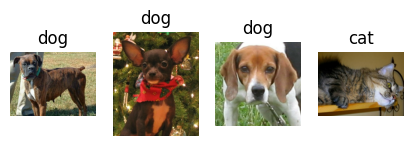

In [5]:
train_iter = iter(ds_train)
fig = plt.figure()
label_name = metadata.features['label'].int2str
plt.tight_layout()
for i in range(4):
    image, label = next(train_iter)
    fig.add_subplot(1, 5, i + 1)
    plt.imshow(image)
    plt.title(label_name(label))
    plt.axis('off')

### Resizing & Rescaling

In [6]:
image.shape

TensorShape([375, 500, 3])

TensorShape([100, 100, 3])

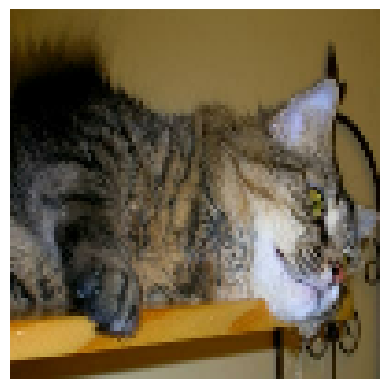

In [7]:
model = Sequential([
    layers.Resizing(100, 100),
    layers.Rescaling(1.00/255)
])

res = model(image)
plt.axis('off')
plt.imshow(res)

res.shape

### Random Flipping and Rotation

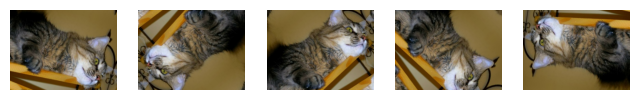

In [8]:
model = Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.4) # If single vlaue, Then rotated by that angle always, can also provide a [x, y] range,
])

plt.figure(figsize = (8, 7))

for i in range(5):
    res = model(image)
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(res.numpy()/255)
    plt.axis('off')

### Random Contrast

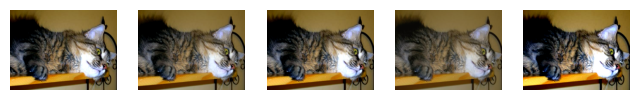

In [9]:
model = Sequential([
    layers.RandomContrast([0.1, 0.9]),
])

plt.figure(figsize = (8, 7))

for i in range(5):
    res = model(image)
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(res.numpy()/255)
    plt.axis('off')

### Random Crop

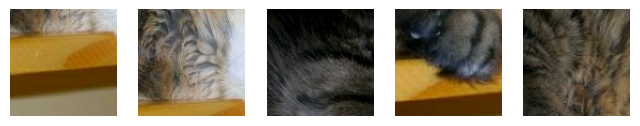

In [10]:
model = Sequential([
    layers.RandomCrop(100, 100),
])

plt.figure(figsize = (8, 7))

for i in range(5):
    res = model(image)
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(res.numpy()/255)
    plt.axis('off')

### Random Zoom

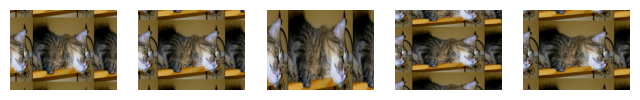

In [11]:
model = Sequential([
    layers.RandomZoom(height_factor=(-1, 1), width_factor=(0.1, 0.9), fill_mode='wrap'),
])

plt.figure(figsize = (8, 7))

for i in range(5):
    res = model(image)
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(res.numpy()/255)
    plt.axis('off')

### Random Height

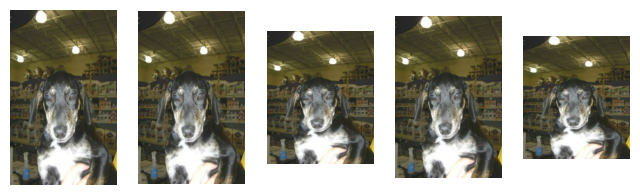

In [44]:
model = Sequential([
    layers.RandomHeight(factor=0.3),
])

plt.figure(figsize = (8, 7))

for i in range(5):
    res = model(image)
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(res.numpy()/255)
    plt.axis('off')

### Random Width

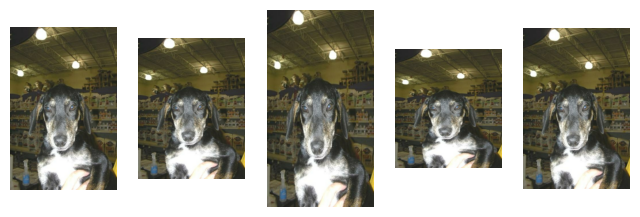

In [48]:
model = Sequential([
    layers.RandomWidth(factor=0.3),
])

plt.figure(figsize = (8, 7))

for i in range(5):
    res = model(image)
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(res.numpy()/255)
    plt.axis('off')

### Example of a Data Pre-Processing Function

In [12]:
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

IMG_SIZE = (224, 224)  # Example size

def resize_and_rescale(image):
    # Resize image
    image = tf.image.resize(image, IMG_SIZE)
    # Rescale pixel values to [0, 1]
    image = image / 255.0
    return image

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

def prepare(ds, shuffle=False, augment=False):
  # Resize and rescale all datasets.
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y),
              num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)

  # Batch all datasets.
  ds = ds.batch(batch_size)

  # Use data augmentation only on the training set.
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y),
                num_parallel_calls=AUTOTUNE)

  # Use buffered prefetching on all datasets.
  return ds.prefetch(buffer_size=AUTOTUNE)


train_ds = prepare(ds_train, shuffle=False, augment=True)
val_ds = prepare(ds_valid)
test_ds = prepare(ds_test)

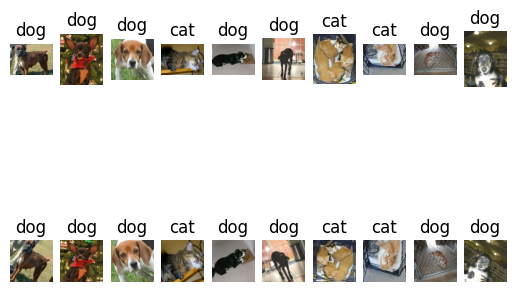

In [14]:
train_iter = iter(ds_train)
train_aug_iter = iter(train_ds.unbatch())
fig = plt.figure()
label_name = metadata.features['label'].int2str
for i in range(10):
    image, label = next(train_iter)
    fig.add_subplot(2, 10, i + 1)
    plt.imshow(image)
    plt.title(label_name(label))
    plt.axis('off')
    
    image1, label1 = next(train_aug_iter)
    fig.add_subplot(2, 10, i + 11)
    plt.imshow(image1)
    plt.title(label_name(label1))
    plt.axis('off')

## Data Augmentation Using tf.image

In [21]:
it = iter(ds_train)

for i in range(4):
    image, label = next(it)

(np.float64(-0.5), np.float64(499.5), np.float64(374.5), np.float64(-0.5))

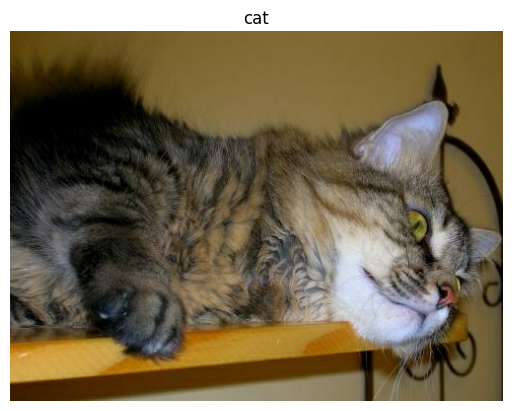

In [22]:
plt.imshow(image)
plt.title(label_name(label))
plt.axis('off')

In [24]:
# Helper Function to Visualize Original vs Augmented

def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original)
    plt.axis("off")
 
    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(augmented)
    plt.axis("off")

### Horizontal Flip

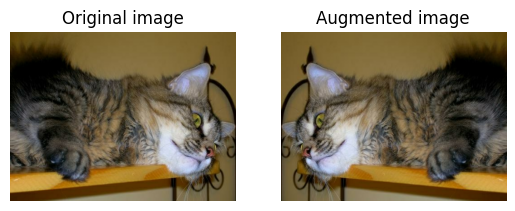

In [25]:
visualize(image, tf.image.flip_left_right(image))

### Vertical Flip

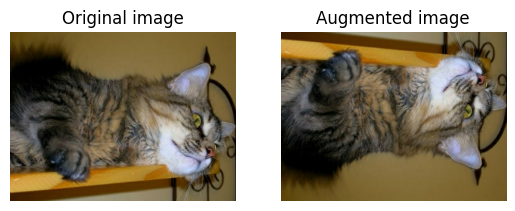

In [26]:
visualize(image, tf.image.flip_up_down(image))

### Greyscale

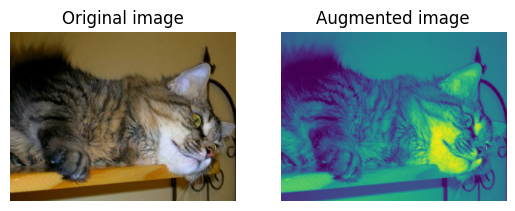

In [29]:
visualize(image, tf.image.rgb_to_grayscale(image))

### Saturation

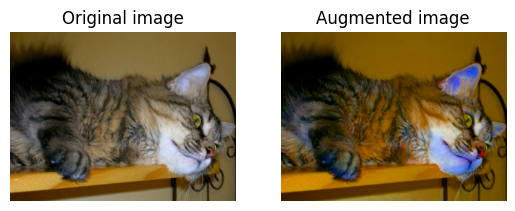

In [30]:
visualize(image, tf.image.adjust_saturation(image, 3))

### Brightness

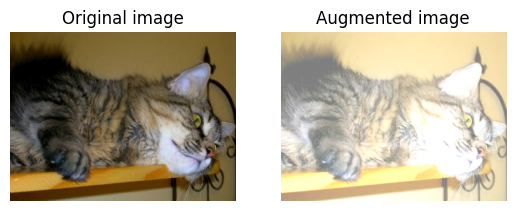

In [31]:
visualize(image, tf.image.adjust_brightness(image, 0.5))

### Central Crop

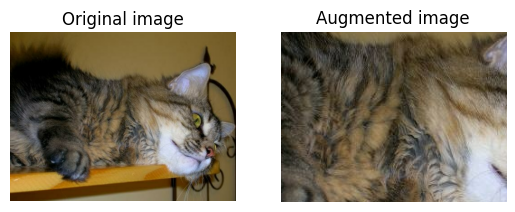

In [32]:
visualize(image, tf.image.central_crop(image, central_fraction=0.5))

### Rotate 90 ACW

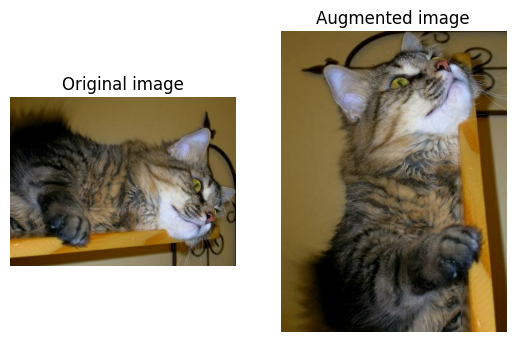

In [33]:
visualize(image, tf.image.rot90(image))

### Pre-Processing Function Using tf.image

In [41]:
def augment(image, label):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, [100, 100])
  image = (image / 255.0)
  image = tf.image.random_crop(image, size=[100, 100, 3])
  image = tf.image.random_brightness(image, max_delta=0.5)
  return image, label


train_ds = (
    ds_train
    .map(augment, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

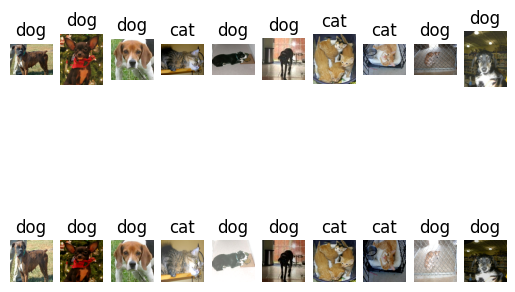

In [42]:
train_iter = iter(ds_train)
train_aug_iter = iter(train_ds.unbatch())
fig = plt.figure()
label_name = metadata.features['label'].int2str
for i in range(10):
    image, label = next(train_iter)
    fig.add_subplot(2, 10, i + 1)
    plt.imshow(image)
    plt.title(label_name(label))
    plt.axis('off')
    
    image1, label1 = next(train_aug_iter)
    fig.add_subplot(2, 10, i + 11)
    plt.imshow(image1)
    plt.title(label_name(label1))
    plt.axis('off')